# Trend and Seasonality

Topics
+ Autocorrelation
+ Decomposing trend and seasonality (seasonal_decompose, STL)

Data:
+ random data
+ airline passengers
+ stocks
+ temperatures

In [1]:
import numpy, pandas, seaborn 
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
# financial time series data
apple = pandas.read_csv('../Datasets/AAPL.csv', index_col='Date', parse_dates=['Date'])

# consumer time series data
passengers = pandas.read_csv('../Datasets/international-airline-passengers.csv', index_col='Month', parse_dates=['Month'])

# natural/physical time series data
temperatures = pandas.read_csv('../Datasets/daily-min-temperatures.csv', index_col='Date', parse_dates=['Date'])

ts = pandas.DataFrame()
ts['random'] = [ numpy.random.random() for i in range(200) ]
ts['quadratic'] = [ i*i for i in range(200) ]

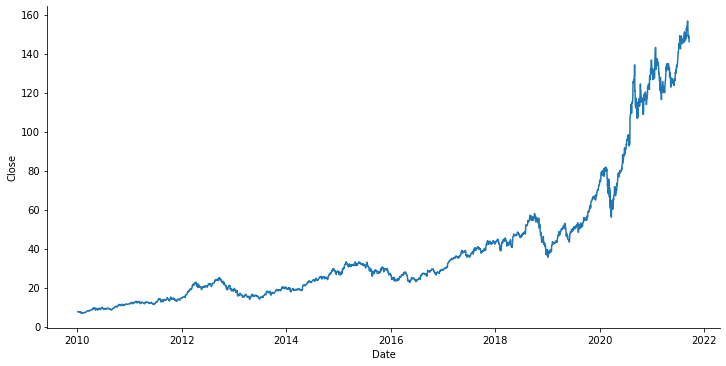

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data = apple, x = 'Date', y = 'Close', 
            kind = 'line', height = 5, aspect = 2)

<AxesSubplot:xlabel='Date', ylabel='Close'>

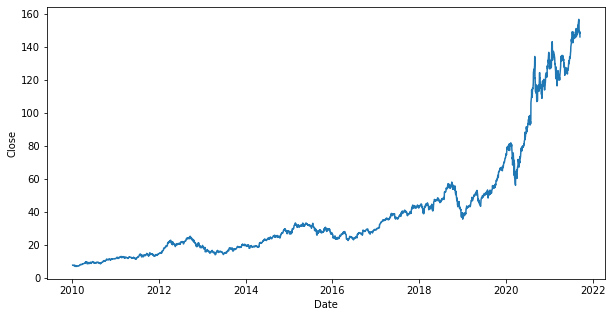

In [11]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = apple, x = 'Date', y = 'Close')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

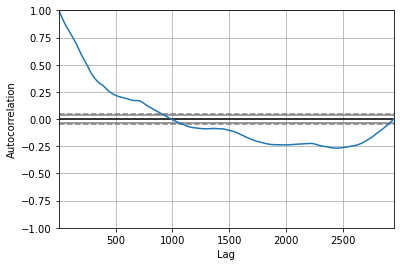

In [17]:
autocorrelation_plot(apple['Close'])

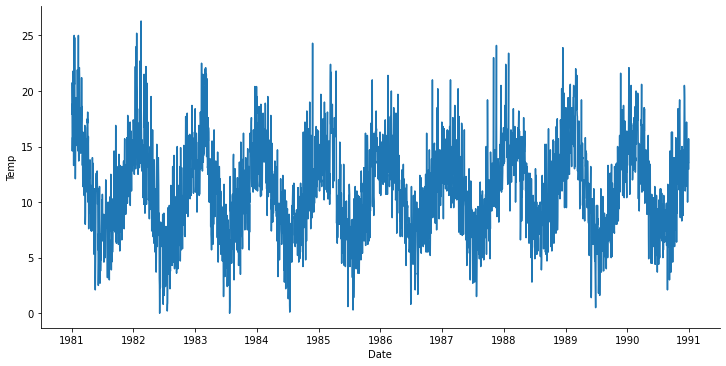

In [13]:
sns.relplot(data = temperatures, x = 'Date', y = 'Temp', 
            kind = 'line', height = 5, aspect = 2)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

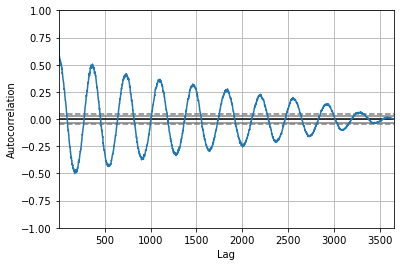

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temperatures)

In [12]:
temperatures.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<AxesSubplot:xlabel='Date'>

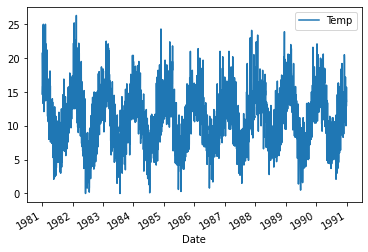

In [3]:
temperatures.plot()

There seems to be seasonality. Let's autocorrelate the series with itself.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

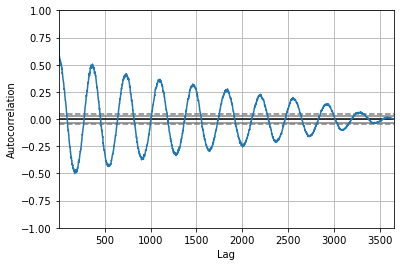

In [4]:
autocorrelation_plot(temperatures)

A random time series has no autocorrelation.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

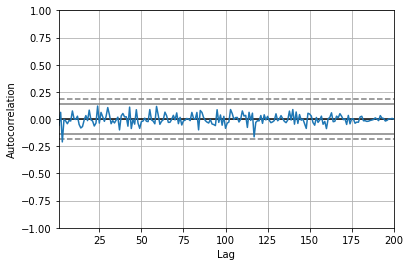

In [5]:
autocorrelation_plot(ts['random'])

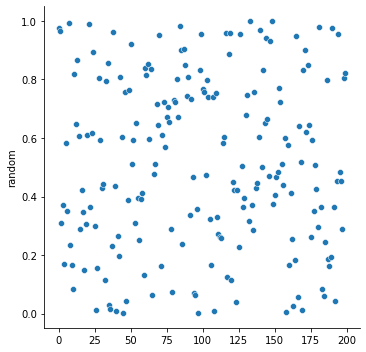

In [15]:
sns.relplot(data = ts, x = ts.index, y = 'random')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

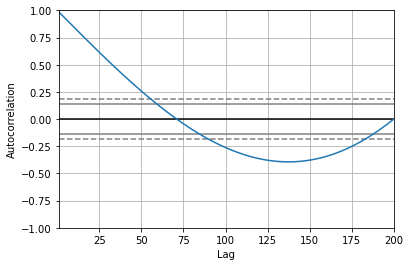

In [7]:
autocorrelation_plot(ts['quadratic'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

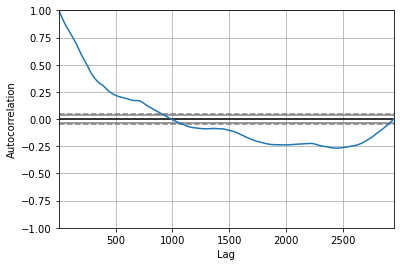

In [7]:
autocorrelation_plot(apple.Close)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

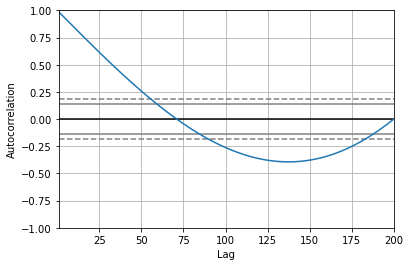

In [9]:
autocorrelation_plot(ts['quadratic'])

The trend dominates the seasonality in apple closing prices.

<AxesSubplot:xlabel='Month'>

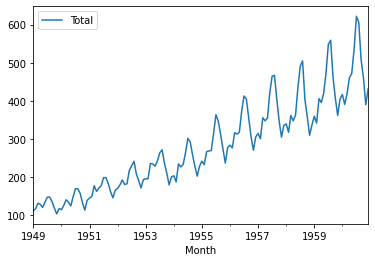

In [10]:
passengers.plot()

In [18]:
passengers.head()

,Total
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


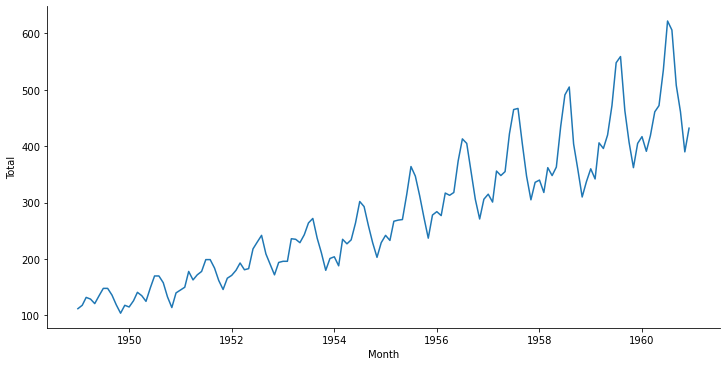

In [19]:
sns.relplot(data = passengers, x = 'Month', y = 'Total', 
            kind = 'line', height = 5, aspect = 2)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

r = seasonal_decompose(passengers, extrapolate_trend = 'freq')

In [23]:
r.trend.head()

Month
1949-01-01    118.588481
1949-02-01    119.734169
1949-03-01    120.879856
1949-04-01    122.025544
1949-05-01    123.171232
Name: trend, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='trend'>

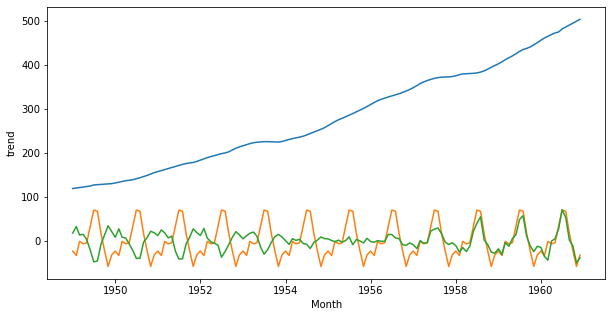

In [31]:
plt.figure(figsize = (10,5))
sns.lineplot(data = r.trend, x = 'Month', y = r.trend)
sns.lineplot(data = r.seasonal, x = 'Month', y= r.seasonal)
sns.lineplot(data = r.resid, x = 'Month', y = r.resid)

<AxesSubplot:xlabel='Month'>

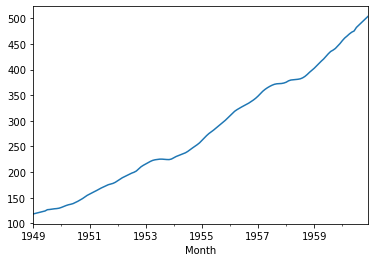

In [22]:
r.trend.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

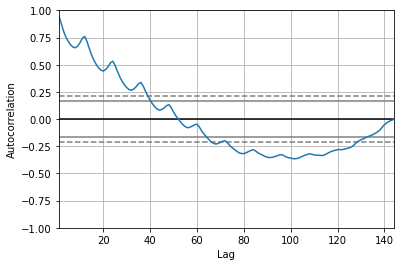

In [11]:
autocorrelation_plot(passengers)

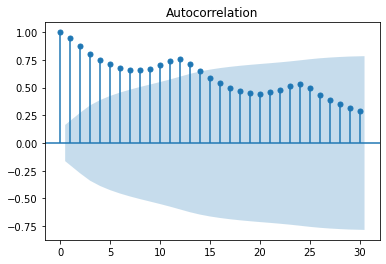

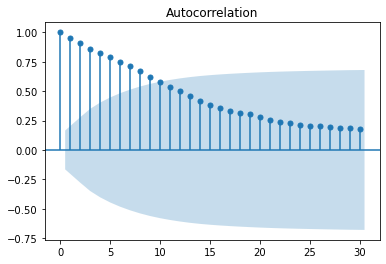

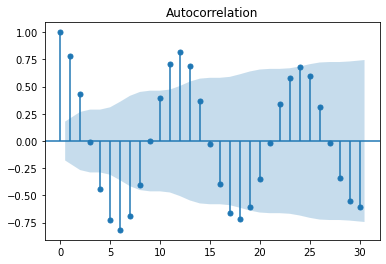

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(passengers, lags=30);
plot_acf(apple['Close'].resample('M').mean(), lags = 30);
plot_acf(temperatures.resample('M').mean(), lags = 30);

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 7)'>

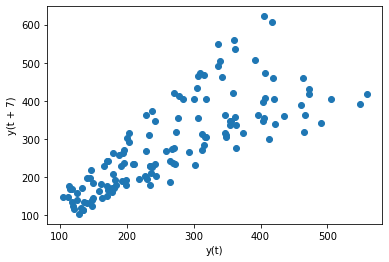

In [14]:
lag_plot(passengers, lag=7)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

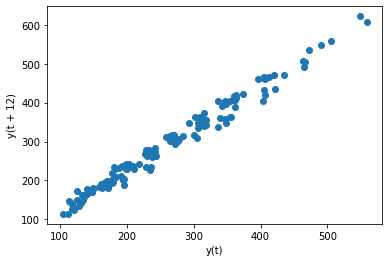

In [15]:
lag_plot(passengers, lag=12)

#### Summary
+ passengers data has both trend and seasonality.
+ apple stock prices are predominantly trendy.
+ temperatures are mostly seasonality.

### Decomposing a time series into trend and seasonality components.

In [53]:
r = seasonal_decompose(temperatures.resample('W').mean(), model='additive', extrapolate_trend='freq')
r2 = STL(temperatures.resample('W').mean()).fit()

In [19]:
r_decom = seasonal_decompose(temperatures.resample('W').mean(), model = 'additive', extrapolate_trend = 'freq')
r_stl = STL(temperatures.resample('W').mean()).fit()

In [54]:
r2.trend + r2.seasonal + r2.resid

Date
1981-01-04    18.000000
1981-01-11    17.542857
1981-01-18    20.371429
1981-01-25    15.771429
1981-02-01    16.657143
                ...    
1990-12-09    17.600000
1990-12-16    12.428571
1990-12-23    14.485714
1990-12-30    13.471429
1991-01-06    13.000000
Freq: W-SUN, Length: 523, dtype: float64

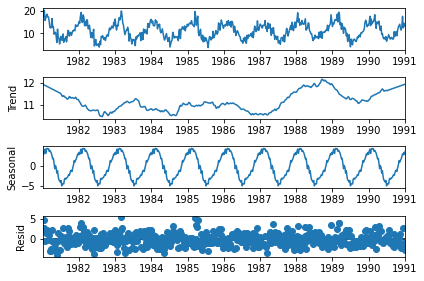

In [31]:
import seaborn as sns
r_decom.plot();

<AxesSubplot:xlabel='Date', ylabel='seasonal'>

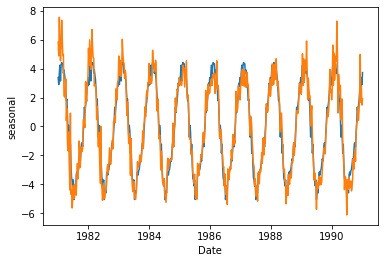

In [29]:
sns.lineplot(data = r_decom.seasonal)
sns.lineplot(data = r_stl.seasonal)

<AxesSubplot:xlabel='Date', ylabel='trend'>

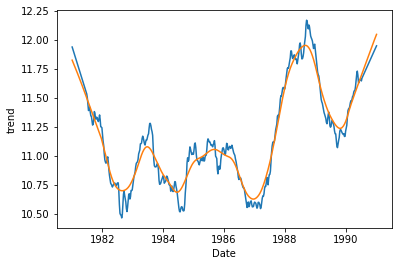

In [22]:
sns.lineplot(data = r_decom.trend)
sns.lineplot(data = r_stl.trend)

<AxesSubplot:xlabel='Date', ylabel='resid'>

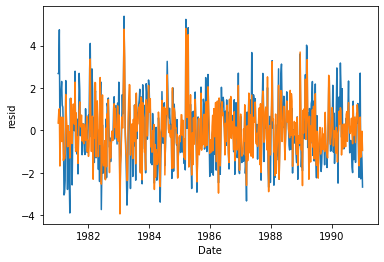

In [24]:
sns.lineplot(data = r_decom.resid)
sns.lineplot(data = r_stl.resid)

c:\users\msaha1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resid', ylabel='Density'>

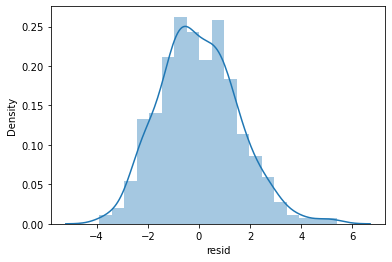

In [26]:
sns.distplot(r_decom.resid)

<AxesSubplot:xlabel='Date'>

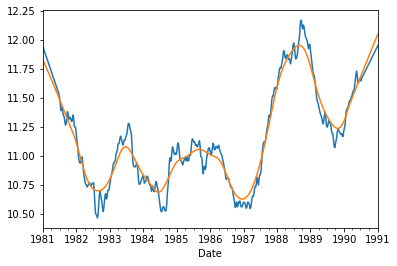

In [55]:
r.trend.plot()
r2.trend.plot()

<AxesSubplot:xlabel='Date'>

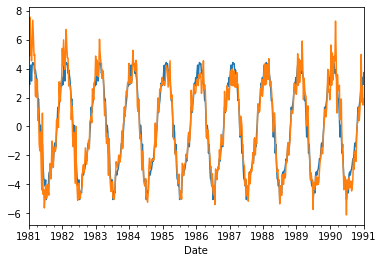

In [56]:
r.seasonal.plot()
r2.seasonal.plot()

<AxesSubplot:xlabel='Date'>

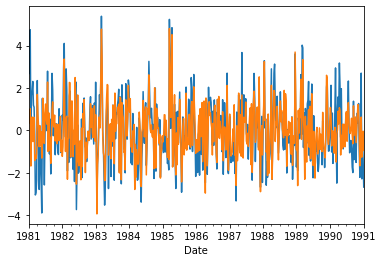

In [57]:
r.resid.plot()
r2.resid.plot()

In [67]:
r = seasonal_decompose(apple.Close.resample('W').mean(), model='additive', extrapolate_trend='freq')
r2 = STL(apple.Close.resample('W').mean()).fit()


<AxesSubplot:xlabel='Date'>

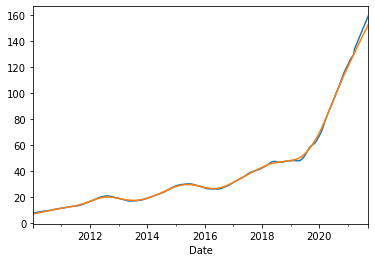

In [70]:
r.trend.plot()
r2.trend.plot()

<AxesSubplot:xlabel='Date'>

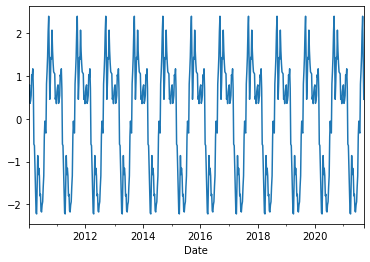

In [72]:
r.seasonal.plot()

<AxesSubplot:xlabel='Date'>

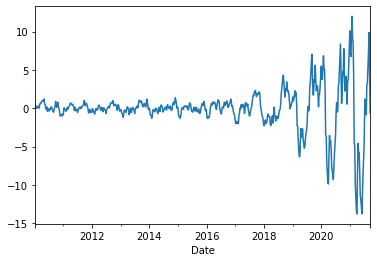

In [73]:
r2.seasonal.plot()

<AxesSubplot:xlabel='Date'>

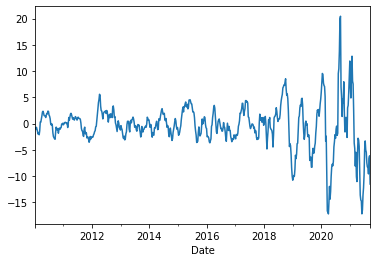

In [74]:
r.resid.plot()

std,mean 3.003447963933853 -0.2253411055786886


<AxesSubplot:xlabel='Date'>

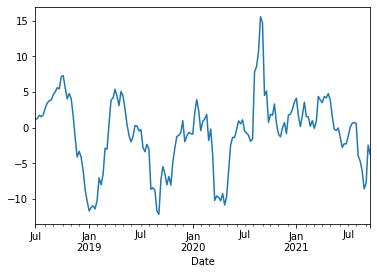

In [82]:
print('std,mean',r2.resid.std(), r2.resid.mean())
r2.resid['2018-07-01': ].plot()

<AxesSubplot:xlabel='Date'>

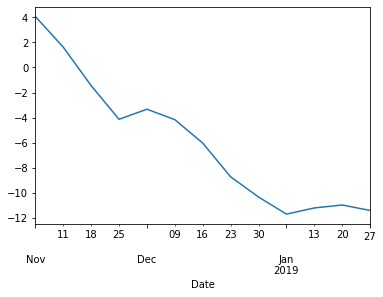

In [88]:
r2.resid['2018-11-1': '2019-2-1'].plot()

In [89]:
r = seasonal_decompose(passengers, model='additive', extrapolate_trend='freq')
r2 = STL(passengers).fit()

<AxesSubplot:xlabel='Month'>

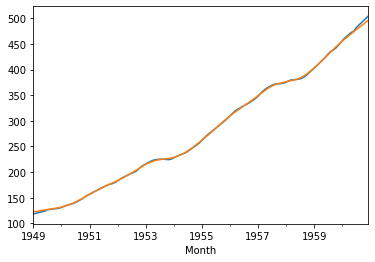

In [91]:
r.trend.plot()
r2.trend.plot()

<AxesSubplot:xlabel='Month'>

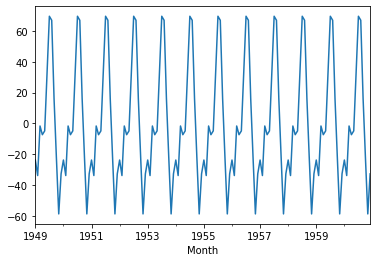

In [93]:
r.seasonal.plot()

<AxesSubplot:xlabel='Month'>

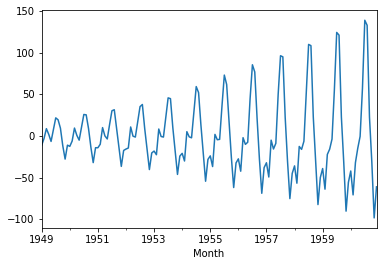

In [95]:
r2.seasonal.plot()

<AxesSubplot:xlabel='Month'>

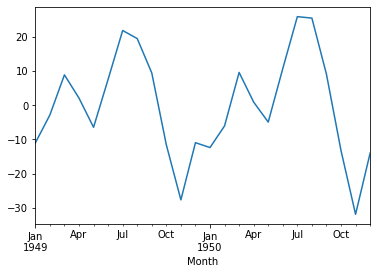

In [99]:
r2.seasonal[0:24].plot()

In the advanced model (STL), seasonal effects get bigger in time.

<AxesSubplot:xlabel='Month'>

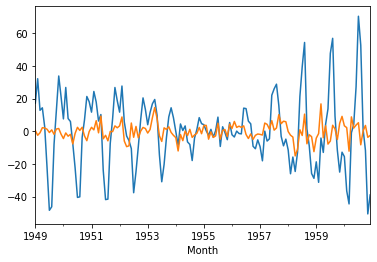

In [98]:
r.resid.plot()
r2.resid.plot()

<AxesSubplot:xlabel='Month'>

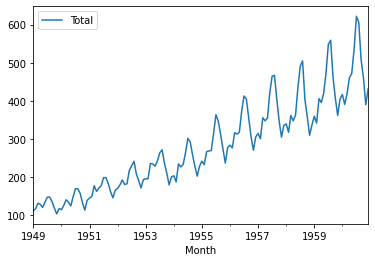

In [100]:
passengers.plot()

Time series forecasting using ARIMA and Seasonal ARIMA.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

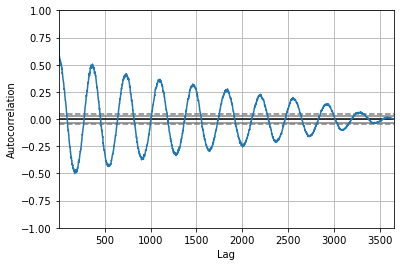

In [102]:
autocorrelation_plot(temperatures)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

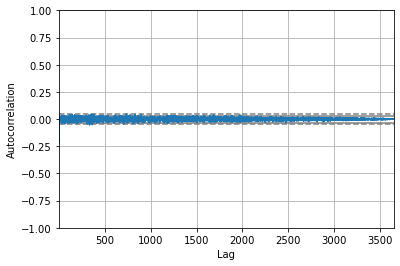

In [112]:
autocorrelation_plot(temperatures.diff(1).dropna())

In [105]:
temperatures.diff(1).dropna()

,Temp
Date,
1981-01-02,-2.8
1981-01-03,0.9
1981-01-04,-4.2
1981-01-05,1.2
1981-01-06,0.0
...,...
1990-12-27,-0.6
1990-12-28,-0.4
1990-12-29,-0.1
